# Risk Parity - Opportunity dataset

Carrie Little

### Import Necessary Libraries

In [1]:
# Carrie Little - AAI5000 Final Project Code
#
# Import All Necessary Libraries
import numpy as np                   
import pandas as pd                  
import matplotlib.pyplot as plt   
import seaborn as sns  
import scipy.stats as stats          
import cvxpy as cp

### Models

Fama-French Factor Model

In [34]:
# http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
fama_french_factors = pd.read_csv('F-F_Research_Data_Factors.csv', parse_dates=['Date'])      # Load Dataset as Dataframe
fama_french_factors.head()                                                                                       # Diaplay 1st 5 inDataframe

,Date,Mkt-RF,SMB,HML,RF
0,2014-11-30,2.55,-2.06,-3.10,0.0
1,2014-12-31,-0.06,2.49,2.27,0.0
2,2015-01-31,-3.11,-0.56,-3.59,0.0
3,2015-02-28,6.13,0.63,-1.86,0.0
4,2015-03-31,-1.12,3.04,-0.38,0.0


In [35]:
df = pd.read_csv('Opportunity_Set.csv', parse_dates=['Date'])      # Load Dataset as Dataframe
df.head()  

,Date,Vanguard LifeStrategy Income Fund (VASIX),Vanguard Total World Stock ETF (VT),PIMCO 25+ Year Zero Coupon US Trs ETF (ZROZ),AQR Diversified Arbitrage I (ADAIX),iShares Gold Trust (IAU),Bitcoin Market Price USD (^BTC),AQR Risk-Balanced Commodities Strategy I (ARCIX),AQR Long-Short Equity I (QLEIX),AQR Style Premia Alternative I (QSPIX),AQR Equity Market Neutral I (QMNIX),AQR Macro Opportunities I (QGMIX),AGF U.S. Market Neutral Anti-Beta (BTAL),AQR Managed Futures Strategy HV I (QMHIX),Invesco DB US Dollar Bullish (UUP),ProShares VIX Mid-Term Futures (VIXM)
0,2014-11-30,0.0094,0.0126,0.0414,-0.0066,-0.0053,0.0969,-0.0726,0.0248,0.0412,0.0257,0.0154,0.0235,0.1159,0.0165,-0.0298
1,2014-12-31,-0.0005,-0.0199,0.0612,-0.0117,0.0133,-0.1777,-0.0412,0.0140,0.0002,0.0195,0.0039,0.0294,0.0461,0.0213,0.0553
2,2015-01-31,0.0141,-0.0163,0.1600,-0.0059,0.0865,-0.2677,-0.0287,0.0156,-0.0112,0.0290,-0.0070,0.0320,0.0721,0.0484,0.0762
3,2015-02-28,0.0033,0.0595,-0.1007,0.0069,-0.0579,0.1062,0.0044,0.0236,-0.0390,-0.0078,0.0091,-0.0568,-0.0108,0.0028,-0.1145
4,2015-03-31,0.0018,-0.0121,0.0117,0.0000,-0.0222,-0.0150,-0.0573,-0.0027,0.0256,0.0049,0.0261,0.0000,0.0655,0.0278,0.0033


In [41]:
import pandas as pd
import statsmodels.api as sm

asset_return = df['Vanguard LifeStrategy Income Fund (VASIX)']  # Replace with your asset's returns

# Step 3: Prepare the factors and align with asset returns by date
factor_returns = fama_french_factors[['Mkt-RF', 'SMB', 'HML']] # Ensure both asset returns and factors are aligned by date
factor_returns_RF = fama_french_factors['RF']  # Risk-free rate
excess_asset_returns = asset_return - factor_returns_RF # Calculate excess returns over risk-free rate

# Add a constant (alpha) to the model
X = sm.add_constant(factor_returns[['Mkt-RF', 'SMB', 'HML']])
y = excess_asset_returns

# Fit the model
model = sm.OLS(y, X).fit()

# Display the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9667
Date:                Thu, 03 Oct 2024   Prob (F-statistic):              0.411
Time:                        00:50:01   Log-Likelihood:                 57.434
No. Observations:                 118   AIC:                            -106.9
Df Residuals:                     114   BIC:                            -95.78
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1267      0.014     -8.839      0.0

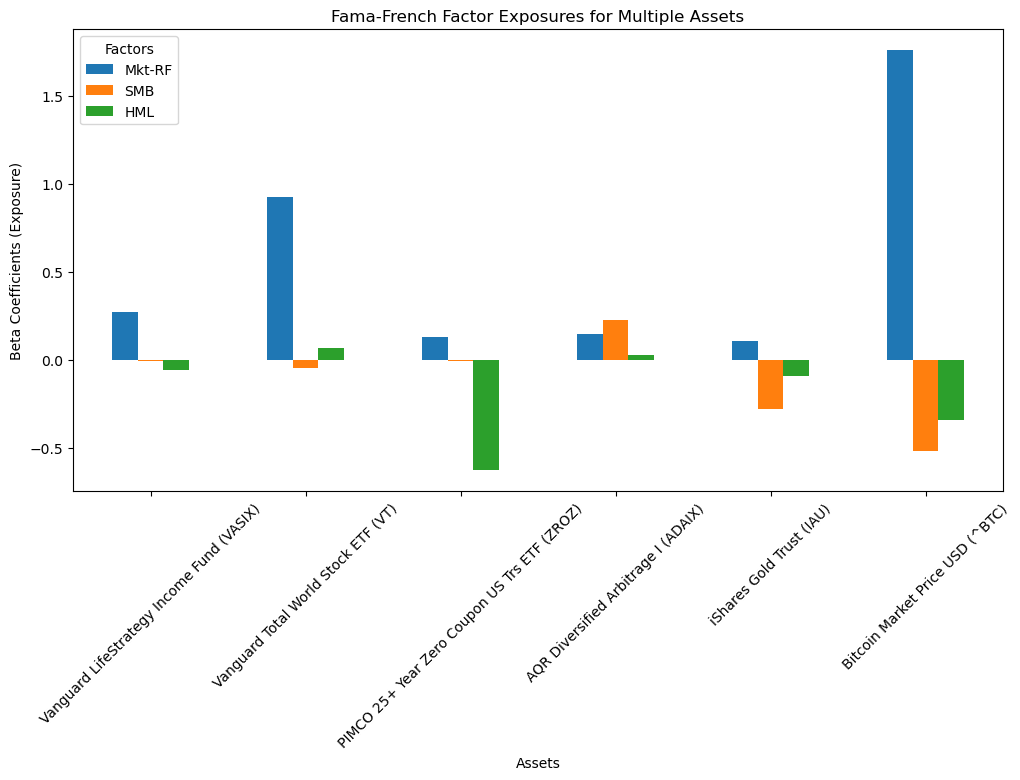

In [46]:
# Merge the two datasets on the 'Date' column
merged_df = pd.merge(df, fama_french_factors, on='Date')

# Set the index to 'Date' for easier handling
merged_df.set_index('Date', inplace=True)

# Prepare the assets for regression (list of asset columns)
asset_columns = [
    'Vanguard LifeStrategy Income Fund (VASIX)', 
    'Vanguard Total World Stock ETF (VT)', 
    'PIMCO 25+ Year Zero Coupon US Trs ETF (ZROZ)', 
    'AQR Diversified Arbitrage I (ADAIX)',
    'iShares Gold Trust (IAU)', 
    'Bitcoin Market Price USD (^BTC)'
]

# We need to calculate excess returns for the assets (subtracting the risk-free rate RF)
for asset in asset_columns:
    merged_df[asset] = merged_df[asset] - (merged_df['RF'] / 100)  # Converting RF to percentage

# Prepare the factor data for the regression (convert from percentage to decimal)
factor_columns = ['Mkt-RF', 'SMB', 'HML']
merged_df[factor_columns] = merged_df[factor_columns] / 100

# Perform Fama-French 3-factor regression for each asset
import statsmodels.api as sm

betas = pd.DataFrame()

for asset in asset_columns:
    X = sm.add_constant(merged_df[factor_columns])  # Add constant (alpha)
    y = merged_df[asset]  # Asset's excess returns
    model = sm.OLS(y, X).fit()  # Fit OLS regression
    
    # Collect the coefficients (betas) for each asset
    betas[asset] = model.params[1:]  # Ignore the intercept (alpha), take only factor betas

# Rename the index for factors
betas.index = factor_columns
betas

# Now we can visualize the beta exposures for all assets
betas.T.plot(kind='bar', figsize=(12, 6))
plt.title('Fama-French Factor Exposures for Multiple Assets')
plt.xlabel('Assets')
plt.ylabel('Beta Coefficients (Exposure)')
plt.xticks(rotation=45)
plt.legend(title='Factors')

# Display the plot
plt.show()

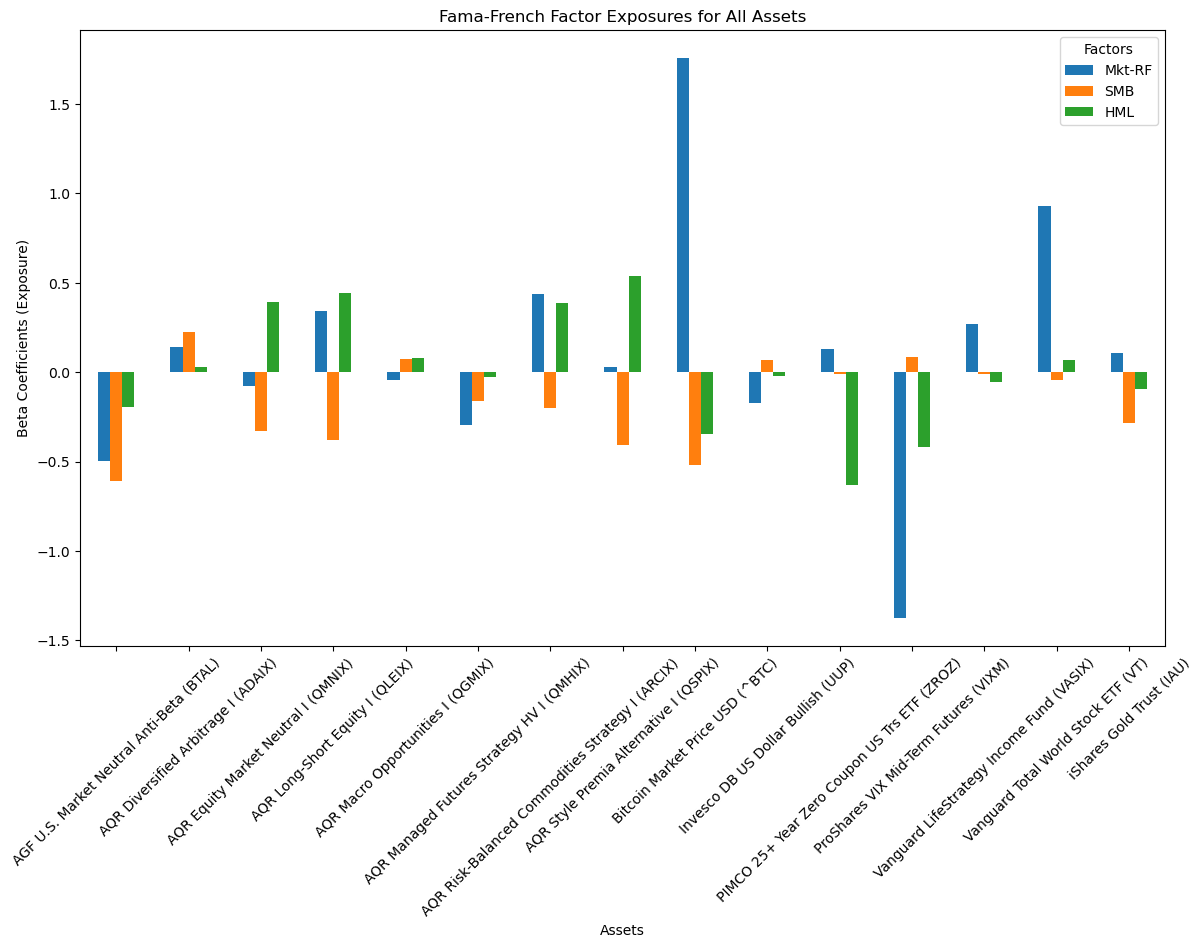

In [48]:
# Let's extend the analysis to include all assets in the opportunity dataset.

# Extract all asset columns (ignoring the factor columns)
all_asset_columns = merged_df.columns.difference(factor_columns + ['RF']).tolist()

# Initialize an empty DataFrame to store the betas for all assets
all_betas = pd.DataFrame()

# Perform Fama-French 3-factor regression for each asset
for asset in all_asset_columns:
    X = sm.add_constant(merged_df[factor_columns])  # Add constant (alpha)
    y = merged_df[asset]  # Asset's excess returns
    model = sm.OLS(y, X).fit()  # Fit OLS regression
    
    # Collect the coefficients (betas) for each asset
    all_betas[asset] = model.params[1:]  # Ignore the intercept (alpha), take only factor betas

# Rename the index for factors
all_betas.index = factor_columns

all_betas

# Visualize the beta exposures for all assets
all_betas.T.plot(kind='bar', figsize=(14, 8))
plt.title('Fama-French Factor Exposures for All Assets')
plt.xlabel('Assets')
plt.ylabel('Beta Coefficients (Exposure)')
plt.xticks(rotation=45)
plt.legend(title='Factors')

# Display the plot
plt.show()


Betas (𝛽1,𝛽2,𝛽3) : These represent the asset’s sensitivity to each factor. 

A high 𝛽1 (market) means the asset is strongly correlated with market movements.
A positive 𝛽2 (SMB) means the asset has small-cap exposure.
A positive β3 (HML) means the asset has exposure to value stocks.


<div class="alert alert-block alert-info">

**References**

Agresti, Alan, and Maria Kateri. Foundations of Statistics for Data Scientists: With R and Python. CRC Press, Taylor & Francis Group, 2022. 

Agresti, Alan, and Maria Kateri. (2022) Appendix B2. Chapter 2: Python for Probability Distributions. In Foundations of Statistics for Data Scientists: With R and Python  (p. 385-389). CRC Press, Taylor & Francis Group, 2022.

ChatGPT, (2024) GPT-4o version, OpenAI. [Large language model]. https://chatgpt.com/

Opportuinty Dataset - need link/website info

 Kenneth French's website. http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

</div>
